In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# Load the data set fo analysis

In [3]:
df = pd.read_csv ('../data/customer_support_tickets.csv',
                  parse_dates = ['Date of Purchase' ,'First Response Time', 'Time to Resolution'])
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
#Lets now do some exploration

In [5]:
print(df.info())
#check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [6]:
#Calculate Ticket Resolution Duration

In [8]:
# Calculate resolution duration
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

df['Resolution Duration(hrs)'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600
df [['Ticket ID','Ticket Priority','Resolution Duration(hrs)']].head()
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Duration(hrs)
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,6.850000
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-5.533333
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,19.683333


In [9]:
# Keep rows where duration is either missing (NaN), zero, or positive
df = df[(df['Resolution Duration(hrs)'].isna()) | (df['Resolution Duration(hrs)'] >= 0)]

In [10]:
initial_count = len(df)
df = df[(df['Resolution Duration(hrs)'].isna()) | (df['Resolution Duration(hrs)'] >= 0)]
removed_count = initial_count - len(df)

print(f"Removed {removed_count} rows with negative resolution durations.")


Removed 0 rows with negative resolution durations.


In [11]:
#Get sentiments from the ticket description
def get_sentiment(text):
    try:
        score = TextBlob(text).sentiment.polarity
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

df['Sentiment'] = df['Ticket Description'].apply(get_sentiment)
df['Sentiment'].value_counts()
df.to_csv('../data/cleaned_support.csv', index= False)

/tmp/ipykernel_7147/3579235793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette='Blues_d')


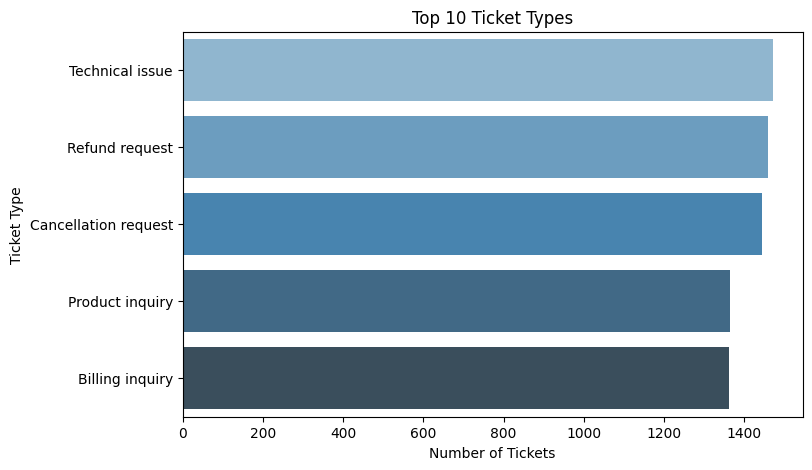

In [12]:
# A chart for Top 10 ticket type
top_types = df['Ticket Type'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_types.values, y=top_types.index, palette='Blues_d')
plt.title('Top 10 Ticket Types')
plt.xlabel('Number of Tickets')
plt.ylabel('Ticket Type')
plt.savefig('../outputs/charts/top_ticket_types.png')
plt.show()


/tmp/ipykernel_7147/3465365070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_time.values, y=priority_time.index, palette='viridis')


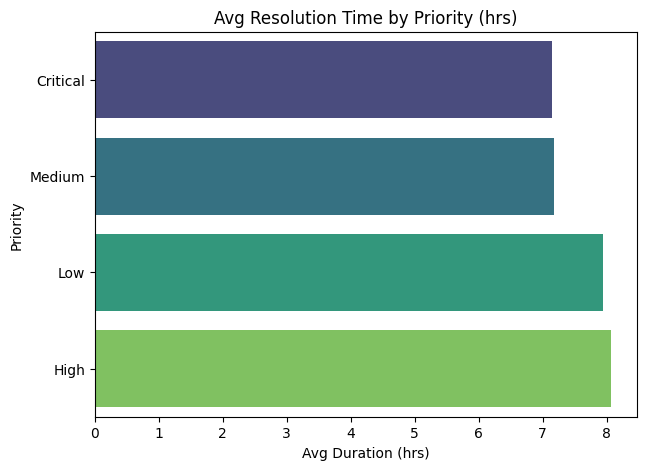

In [13]:
priority_time = df.groupby('Ticket Priority')['Resolution Duration(hrs)'].mean().sort_values()
plt.figure(figsize=(7,5))
sns.barplot(x=priority_time.values, y=priority_time.index, palette='viridis')
plt.title('Avg Resolution Time by Priority (hrs)')
plt.xlabel('Avg Duration (hrs)')
plt.ylabel('Priority')
plt.savefig('../outputs/charts/avg_resolution_by_priority.png')
plt.show()

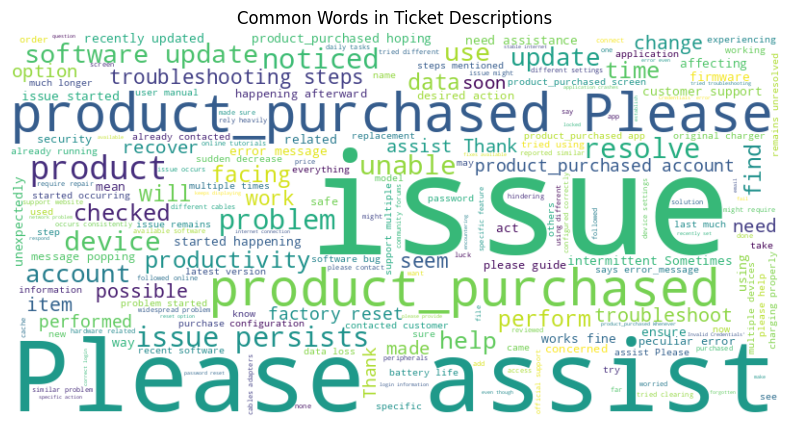

In [14]:
# wordcloud to find coomon words used in ticket description
text = ' '.join(df['Ticket Description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Ticket Descriptions')
plt.savefig('../outputs/charts/wordcloud_ticket_descriptions.png')
plt.show()


In [13]:
#Sentiment Analysis on Ticket Descriptions:We will use TextBlob to estimate the sentiment polarity of ticket descriptions and classify them as Positive, Neutral, or Negative.

In [14]:
def get_sentiment(text):
    try:
        score = TextBlob(text).sentiment.polarity
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

df['Sentiment'] = df['Ticket Description'].apply(get_sentiment)
df['Sentiment'].value_counts()


Sentiment
Positive    718
Negative    417
Neutral     269
Name: count, dtype: int64

/tmp/ipykernel_17770/4095940750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


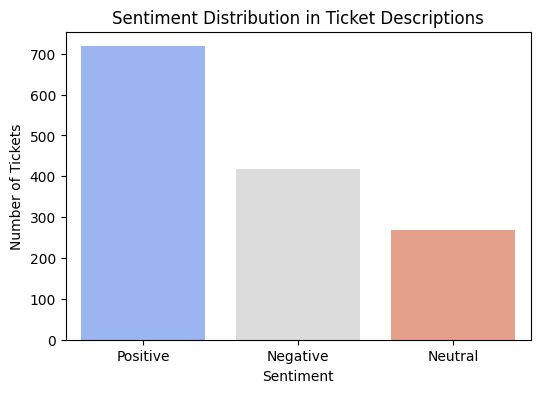

In [15]:
# Draw a sentiment Distribution Chart
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution in Ticket Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tickets')
plt.savefig('../outputs/charts/sentiment_distribution_tickets.png')
plt.show()


In [16]:
#Lets identify which communication channels received the most high-priority tickets.

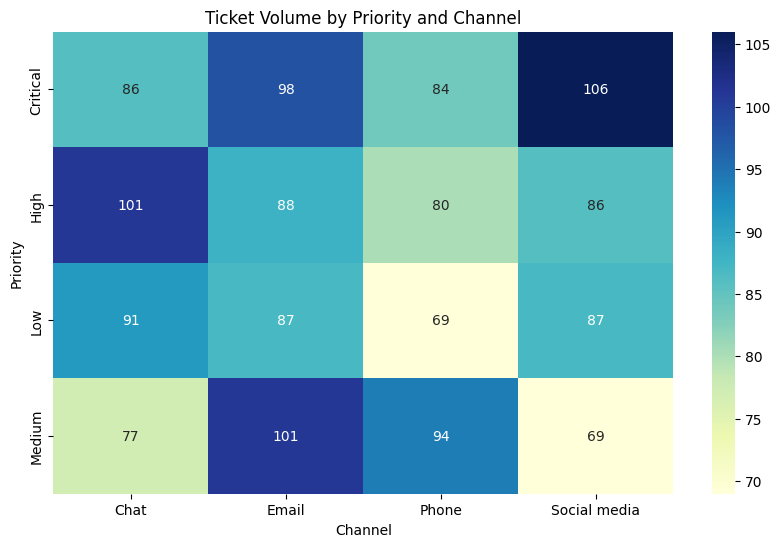

In [17]:
heatmap_data = pd.crosstab(df['Ticket Priority'], df['Ticket Channel'])
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Ticket Volume by Priority and Channel')
plt.xlabel('Channel')
plt.ylabel('Priority')
plt.savefig('../outputs/charts/priority_channel_heatmap.png')
plt.show()


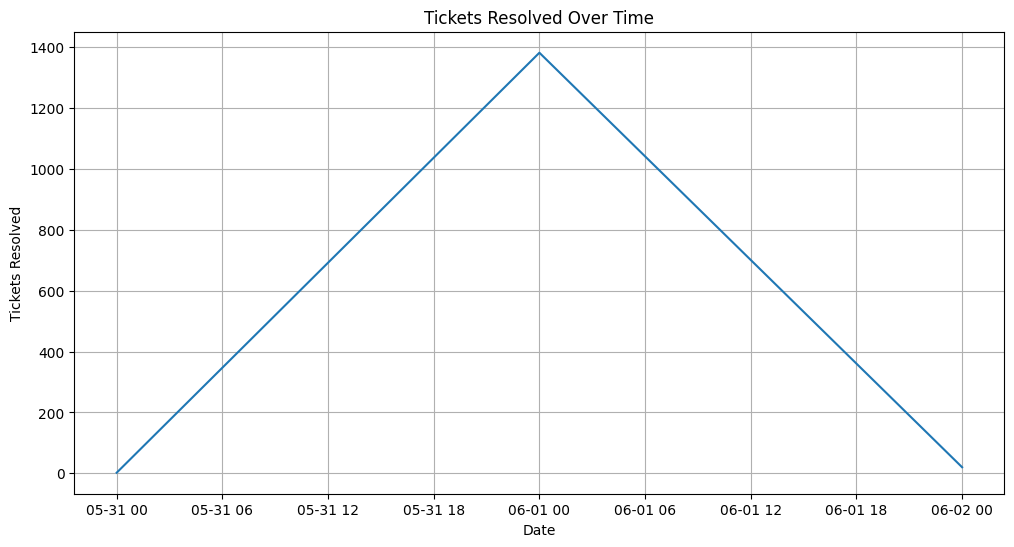

In [18]:
#Ticket Resolution over time
df['Resolution Date'] = pd.to_datetime(df['Time to Resolution'], errors='coerce').dt.date
time_series = df['Resolution Date'].value_counts().sort_index()

plt.figure(figsize=(12,6))
time_series.plot(kind='line')
plt.title('Tickets Resolved Over Time')
plt.xlabel('Date')
plt.ylabel('Tickets Resolved')
plt.grid(True)
plt.savefig('../outputs/charts/tickets_resolved_over_time.png')
plt.show()


In [19]:
# Table 1: Top ticket types
top_types = df['Ticket Type'].value_counts().head(10).reset_index()
top_types.columns = ['Ticket Type', 'Number of Tickets']

# Table 2: Avg resolution time by priority
resolution_avg = df.groupby('Ticket Priority')['Resolution Duration(hrs)'].mean().reset_index()
resolution_avg.columns = ['Ticket Priority', 'Avg Resolution Time (hrs)']

top_types.to_csv('../outputs/summary_reports/top_ticket_types.csv', index=False)
resolution_avg.to_csv('../outputs/summary_reports/avg_resolution_by_priority.csv', index=False)


In [20]:
#export cleaned dataset
df.to_csv('../data/cleaned_support_ticket.csv ', index= False )